# Naïve Bayes


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

## Datos (_handwritten digits_)


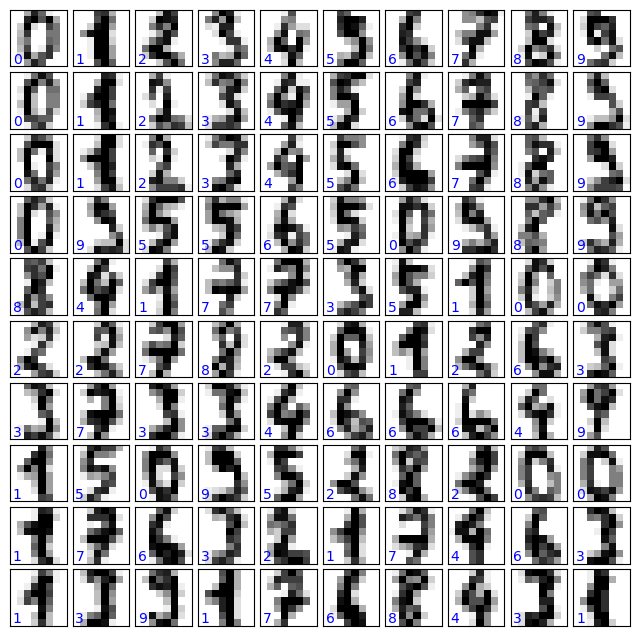

In [4]:
digits = load_digits()

fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={
                         'xticks': [], 'yticks': []}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest'),
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='blue')

In [5]:
X, y = digits.data, digits.target
X.shape, y.shape

((1797, 64), (1797,))

## División de los datos en entrenamiento y validación


In [11]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size=0.8, random_state=0)

display(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(1437, 64)

(360, 64)

(1437,)

(360,)

## Entrenamiento y evaluación del modelo


In [13]:
model = MultinomialNB()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print(f'Training accuracy: {train_acc:.2f}')
print(f'Validation accuracy: {val_acc:.2f}')

Training accuracy: 0.90
Validation accuracy: 0.91


## Ejemplos de forma gráfica


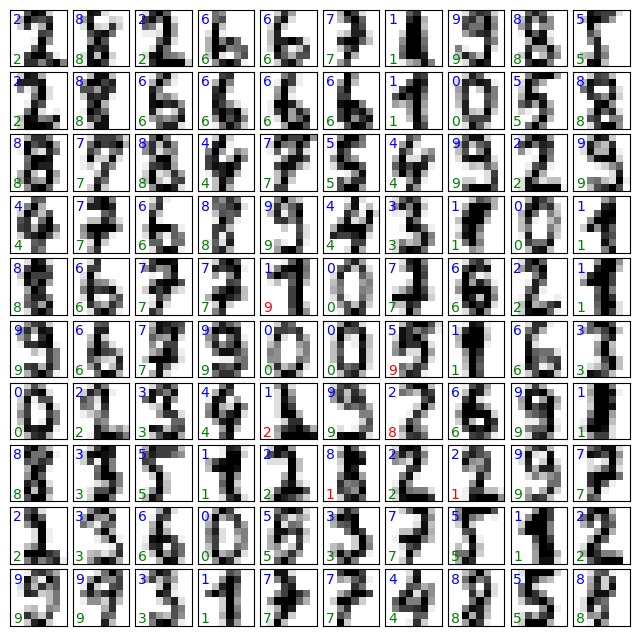

In [35]:
# Show validation data
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={
                         'xticks': [], 'yticks': []}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_val[i].reshape(8, 8), cmap='binary', interpolation='nearest'),
    ax.text(0.05, 0.75, str(y_val[i]),
            transform=ax.transAxes, color='blue')
    ax.text(0.05, 0.05, str(y_val_pred[i]), transform=ax.transAxes,
            color='green' if y_val[i] == y_val_pred[i] else 'red')